In [1]:
#classifying diabetes

import pandas as pd
import numpy as np

#시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 처리
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE # handling imbalanced data

# 머신러닝
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

# 분류모델
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 6. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

# 7. Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 읽기
data = pd.read_csv("/content/data-Lab-2-5-diabet.csv", header = None, names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
# 헤더가 없는 엑셀 파일이라 header = None으로 표시하여 불러온다. 열 이름을 헷갈리지 않게 지정

# 데이터 앞부분 예시 표시
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


In [26]:
# 데이터셋 분리 - 학습 데이터셋과 테스트 데이터셋
x = data.drop('Outcome',axis=1)
y = data['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.15, stratify=y)

# 재현성을 위해 랜덤 스테이트를 42로 설정하고, test 케이스 사이즈는 전체 데이터의 15%로 설정함

In [27]:
y_train.value_counts()

,count
Outcome,
1,422
0,223


In [28]:
smote = SMOTE(random_state=0)

x_train, y_train = smote.fit_resample(x_train,y_train)
#x_test, y_test = smote.fit_resample(x_test,y_test)

#SMOTE 사용
# 데이터 셋의 개수가 800개로 매우 작아서 불균형하게 학습/평가 데이터셋이 생성되는 것을 방지하기 위함
# 불균형한 데이터셋은 학습 데이터에 대해서만 학습하여 실제 테스트에서는 정확도가 낮을 수 있기 때문에 사용
# 소수 클래스에 대한 새로운 샘플을 기존 데이터 포인트 사이에서 선형적으로 생성합니다. 단순 복제하는 것이 아니라 기존 소수 클래스 데이터 포인트 사이에 새로운 데이터를 만들어서, 데이터를 확장하는 방식 -> 균형있는 학습 데이터셋 생성


In [29]:
y_train.value_counts()
#실제로 당뇨인 데이터셋 당뇨가 아닌 데이터의 개수를 동일하게 선형적인 방법으로 확장

,count
Outcome,
1,422
0,422


In [30]:
model_LR = LogisticRegression() #로지스틱 (전통 회귀분류모형)
model_XGB = XGBClassifier() #XGB 분류모델
model_RFC = RandomForestClassifier() #랜덤포레스트 분류모델
model_SVM = SVC() #서포트벡터머신 분류모델

In [31]:
alg = ['LogisticRegression','SVC','RandomForestClassifier','XGBoostClaassifier']
acc = []
rec= []
F1 = []

def evaluate(model):
  model.fit(x_train,y_train)   #모델 피팅
  pre = model.predict(x_test)  #모델 예측값 생성
  accuracy = accuracy_score(pre,y_test) #모델 정확도
  recall = recall_score(pre,y_test)  #Recall (모델 재현율): 실제로 양성인 것들 중에서 모델이 양성으로 예측한 비율 (의학적 진단에서 양성인 사람을 양성으로 진단하는 것이 중요)

  acc.append(accuracy)
  rec.append(recall)

  sns.heatmap(confusion_matrix(pre,y_test),annot=True)
  print(model)
  print('Accuracy : ',accuracy,'Recall : ',recall,)

LogisticRegression()
Accuracy :  0.7543859649122807 Recall :  0.8285714285714286


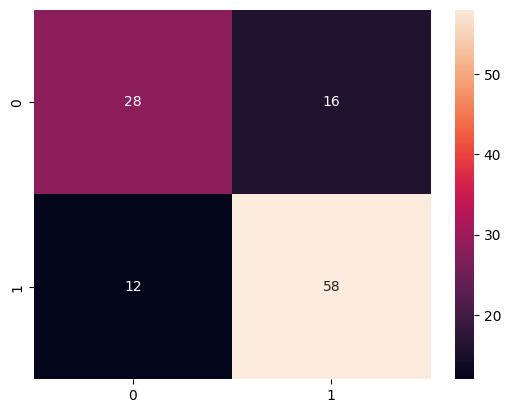

In [32]:
evaluate(model_LR)

SVC()
Accuracy :  0.7631578947368421 Recall :  0.8615384615384616


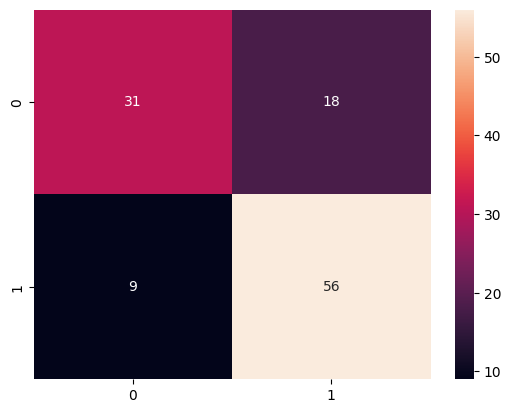

In [33]:
evaluate(model_SVM)

RandomForestClassifier()
Accuracy :  0.7105263157894737 Recall :  0.7733333333333333


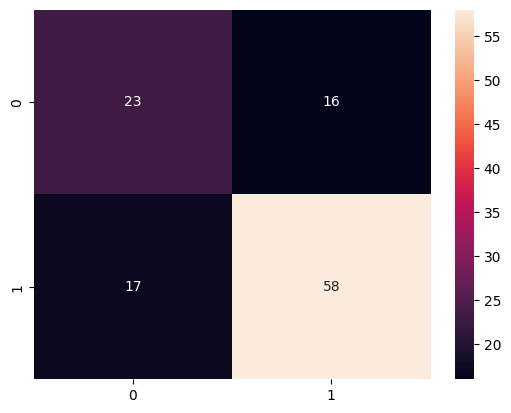

In [34]:
evaluate(model_RFC)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy :  0.7368421052631579 Recall :  0.8055555555555556


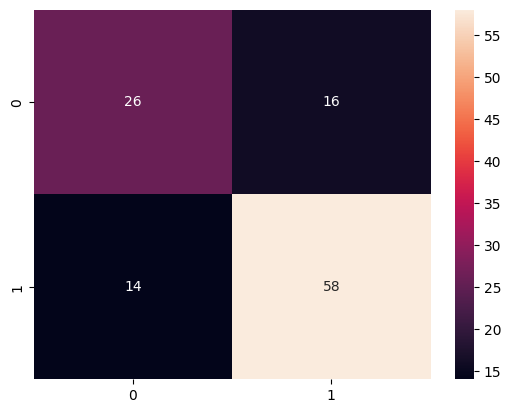

In [35]:
evaluate(model_XGB)

In [36]:
final_result = pd.DataFrame({"Algorithm":alg ,'Accuarcy':acc,"recall":rec})
final_result

,Algorithm,Accuarcy,recall
0,LogisticRegression,0.754386,0.828571
1,SVC,0.763158,0.861538
2,RandomForestClassifier,0.710526,0.773333
3,XGBoostClaassifier,0.736842,0.805556


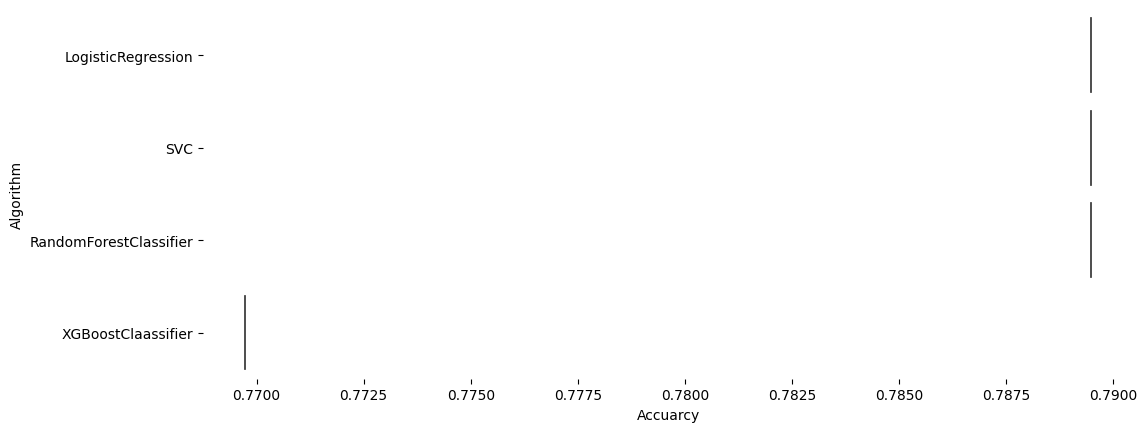

In [14]:
# @title Algorithm vs Accuarcy

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(final_result['Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(final_result, x='Accuarcy', y='Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)